In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
pip install pykalman

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48463 sha256=bcc51bf77057ae45a2c26280c960e2357f102f4822d8783c33e78036dab816a2
  Stored in directory: /root/.cache/pip/wheels/11/16/21/615e29f0001ed6258b25d2a3a84ccfd65c5469b3505d4ab3ab
Successfully built pykalman


In [3]:
import yfinance as yf
data = yf.download("SPY", start="2017-01-01", end="2021-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,225.039993,225.830002,223.880005,225.240005,202.856552,91366500
2017-01-04 00:00:00-05:00,225.619995,226.750000,225.610001,226.580002,204.063385,78744400
2017-01-05 00:00:00-05:00,226.270004,226.580002,225.479996,226.399994,203.901230,78379000
2017-01-06 00:00:00-05:00,226.529999,227.750000,225.899994,227.210007,204.630768,71559900
2017-01-09 00:00:00-05:00,226.910004,227.070007,226.419998,226.460007,203.955292,46939700


In [4]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0


In [6]:
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Adj Close'].values)

# Call it KF_mean
data['KF_mean'] = np.array(state_means)
data.head()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2017-01-03 00:00:00-05:00,225.039993,225.830002,223.880005,225.240005,202.856552,91366500,101.428276
2017-01-04 00:00:00-05:00,225.619995,226.750000,225.610001,226.580002,204.063385,78744400,136.093114
2017-01-05 00:00:00-05:00,226.270004,226.580002,225.479996,226.399994,203.901230,78379000,153.589081
2017-01-06 00:00:00-05:00,226.529999,227.750000,225.899994,227.210007,204.630768,71559900,164.377761
2017-01-09 00:00:00-05:00,226.910004,227.070007,226.419998,226.460007,203.955292,46939700,171.551080


Text(0, 0.5, 'Price')

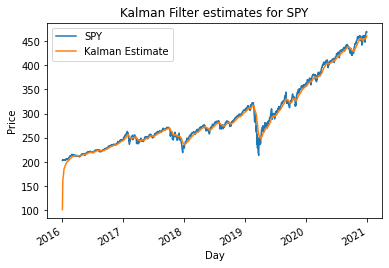

In [7]:
data[['Adj Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for SPY')
plt.legend(['SPY','Kalman Estimate'])
plt.xlabel('Day')
plt.ylabel('Price')